# Data exploration

## Train dataset

In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob

path_annotrain = "../datasets/datasets_train/train_annotation/_annotation.csv"

train_annotation = pd.read_csv(path_annotrain, index_col=0)

In [17]:
train_annotation.head()

,im_name,x_min,y_min,x_max,y_max,class,models
0,107347968.jpg,40.0,244.0,1144.0,637.0,car,Audi S5 Convertible 2012
1,91160576.jpg,4.0,9.0,98.0,76.0,car,Audi 100 Wagon 1994
2,273809408.jpg,16.0,4.0,288.0,191.0,car,Cadillac SRX SUV 2012
3,579534848.jpg,14.0,23.0,255.0,178.0,car,Ford Freestar Minivan 2007
4,950599680.jpg,4.0,70.0,321.0,215.0,car,Rolls-Royce Phantom Sedan 2012


### Class distribution

In [8]:
train_annotation["class"].value_counts().to_frame()

,class
car,1309
Person,135
Eye,77
Food,53
Dog,43
...,...
Parachute,1
High heels,1
Lizard,1
Sink,1


Over half of the images do not contain a car !

### Model distribution

In [29]:
train_annotation[train_annotation["models"]!=" "]["models"].nunique()

100

In [18]:
train_annotation[train_annotation["models"]!=" "]["models"].value_counts().to_frame()

,models
Volvo XC90 SUV 2007,25
Volkswagen Beetle Hatchback 2012,21
Audi A5 Coupe 2012,20
Hyundai Genesis Sedan 2012,20
Mercedes-Benz 300-Class Convertible 1993,20
...,...
Chevrolet TrailBlazer SS 2009,7
Aston Martin Virage Convertible 2012,7
Jeep Grand Cherokee SUV 2012,7
Mercedes-Benz Sprinter Van 2012,4


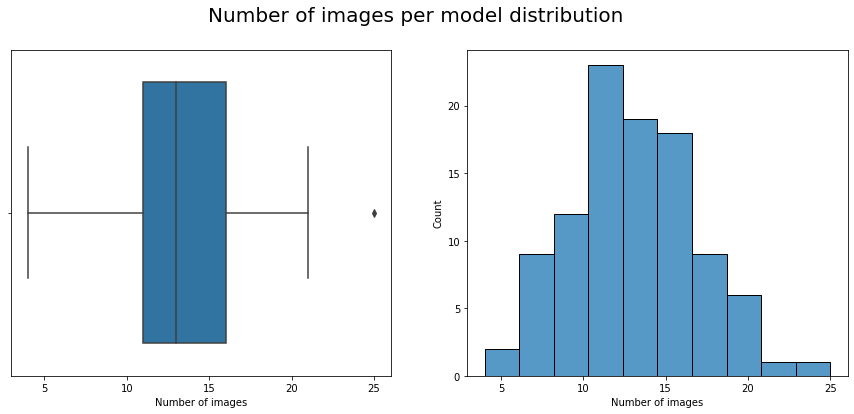

In [31]:
import seaborn as sns

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,2,1)
sns.boxplot(x=train_annotation[train_annotation["models"]!=" "]["models"].value_counts(), ax=ax)
ax.set_xlabel("Number of images")
ax = fig.add_subplot(1,2,2)
sns.histplot(x=train_annotation[train_annotation["models"]!=" "]["models"].value_counts(), ax=ax)
ax.set_xlabel("Number of images")
plt.suptitle("Number of images per model distribution", fontsize=20)
plt.show()

Most models have 10 to 15 supporting images. Some classes have less than 5 images. This is worrying if we are to train a classifier (class support is very low).

## Models dataset

In [7]:
files = pd.Series(glob.glob("../datasets/datasets_train/car_models_database_train/*")).apply(lambda x: x.split("/")[-1].split("_")[-2])
files.value_counts().to_frame()

,0
Audi A5 Coupe 2012,20
Audi S5 Convertible 2012,19
Ford Expedition EL SUV 2009,18
Chevrolet Corvette ZR1 2012,17
Bentley Continental GT Coupe 2007,17
Acura ZDX Hatchback 2012,16
Audi TT RS Coupe 2012,16
Chevrolet Camaro Convertible 2012,15
AM General Hummer SUV 2000,15
Hyundai Veracruz SUV 2012,15


Interestingly, some of those models do not even appear in the main dataset. This dataset only broadens the number of models.

## Visualizing examples

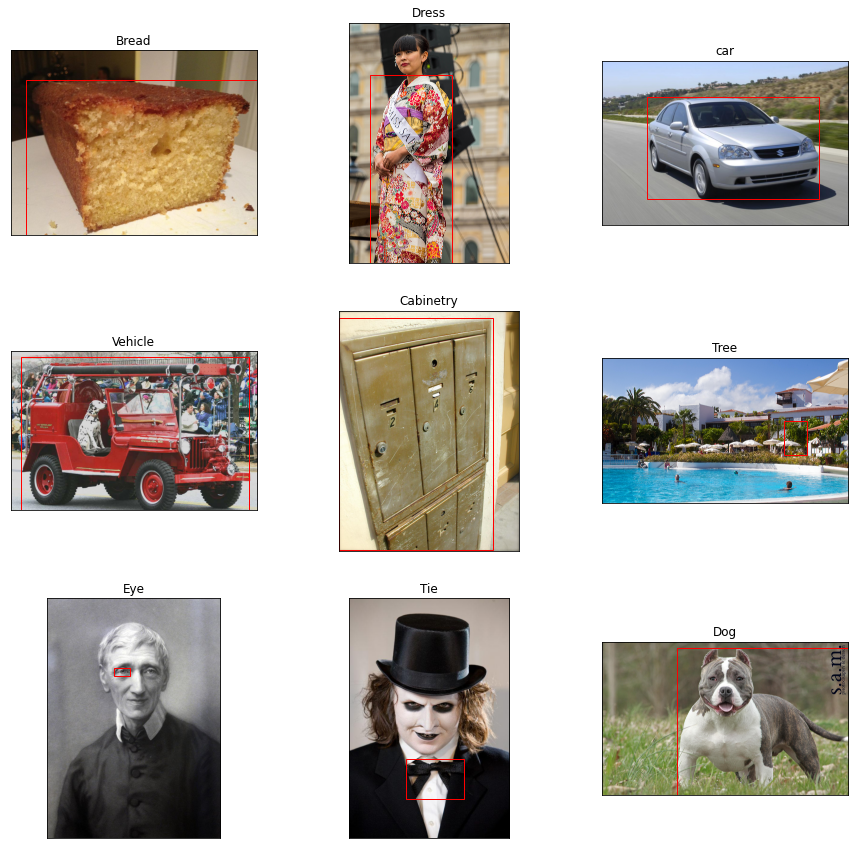

In [32]:
fig = plt.figure(figsize=(15,15))
i=1

for img_path in train_annotation.sample(9).iterrows():
    ax = fig.add_subplot(3,3,i)
    im = np.asanyarray(Image.open("../datasets/datasets_train/train/"+img_path[1]["im_name"]))
    x1, y1, x2, y2 = img_path[1][["x_min","y_min","x_max","y_max"]]
    # Create a Rectangle patch
    rect = patches.Rectangle(
        (x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor="r", facecolor="none"
    )

    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(img_path[1]["class"])
    i+=1
plt.show()

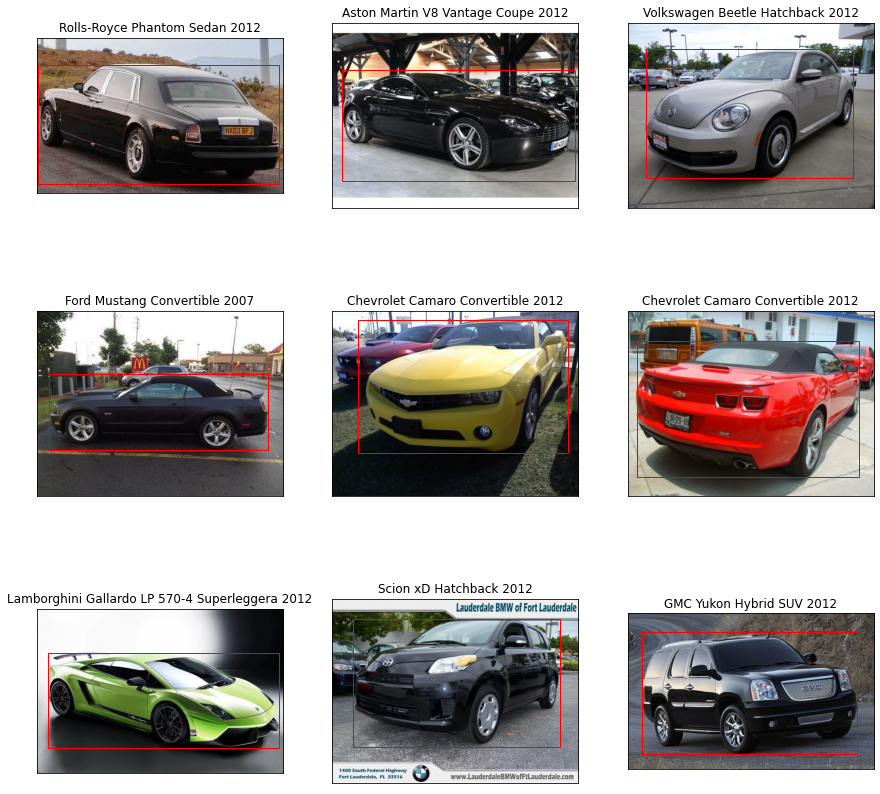

In [32]:
fig = plt.figure(figsize=(15,15))
i=1

for img_path in train_annotation[train_annotation["models"]!=" "].sample(9).iterrows():
    ax = fig.add_subplot(3,3,i)
    im = np.asanyarray(Image.open("../datasets/datasets_train/train/"+img_path[1]["im_name"]))
    x1, y1, x2, y2 = img_path[1][["x_min","y_min","x_max","y_max"]]
    # Create a Rectangle patch
    rect = patches.Rectangle(
        (x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor="r", facecolor="none"
    )

    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(img_path[1]["models"])
    i+=1
plt.show()

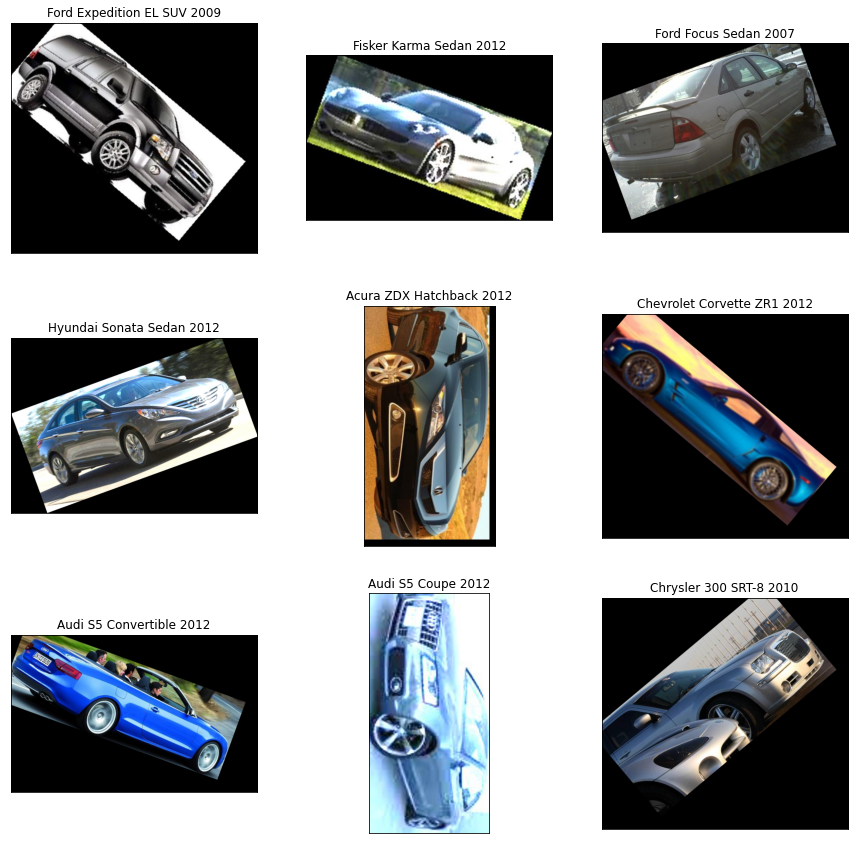

In [36]:
fig = plt.figure(figsize=(15,15))
i=1

models = pd.Series(glob.glob("../datasets/datasets_train/car_models_database_train/*")).to_frame()
models["models"] = models.iloc[:,0].apply(lambda x: x.split("/")[-1].split("_")[-2])

for img_path in models.sample(9).iterrows():
    ax = fig.add_subplot(3,3,i)
    im = np.asanyarray(Image.open(img_path[1][0]))
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(img_path[1]["models"])
    i+=1
plt.show()

The models dataset has gone through some form of data augmentation. The images are also already cropped.

## Emissions dataset and problem formulation

The problem at hand can be divided in two parts, that are found within the metric formula :
- We detect a box within which there is a car (this account for 70% of the evaluation metric)
- We then classify which model the car is to get it's CO2 emission (30% of the metric)

Given our exploration (cf. exploration notebook), we see that the number of observations for each model can be really low. This is worrying because when training CNNs, we can very easily overfit. If we manage to make the problem easier for the model, we avoid overfitting, and most likely generalize better to new data.

The provided data has hidden features. For each model, we have the release year and the model category : SUV, coupé, etc. We will explore this data to see if we could simplify the problem using said features.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

emission_data = pd.read_csv("../datasets/car_models_footprint.csv", sep=";")
emission_data["category"] = emission_data["models"].apply(lambda x: x.split()[-2])
emission_data.head()

,models,Brand,year,Average Urban Consumption,Average extra-urban consumption,Average mixed consumption,Average of CO2 (g per km),Average CO type I,category
0,Ford Fiesta Sedan 2012,Ford,2012,4.900000,3.600,4.100000,107.000000,"0,421",Sedan
1,FIAT 500 Convertible 2012,FIAT,2012,5.725000,4.175,4.775000,111.000000,"0,318",Convertible
2,Chevrolet Corvette ZR1 2012,Chevrolet,2012,19.000000,8.900,12.600000,293.000000,"0,508",ZR1
3,Lamborghini Gallardo LP 570-4 Superleggera 2012,Lamborghini,2012,21.406667,9.860,14.086667,337.133333,0,Superleggera
4,Honda Accord Coupe 2012,Honda,2012,6.900000,4.500,5.400000,141.000000,"0,215",Coupe


In [41]:
print("Mean emissions of models :", emission_data["Average of CO2 (g per km)"].mean())
print("Standard deviation of emissions of models :", emission_data["Average of CO2 (g per km)"].std())

Mean emissions of models : 200.87037463399997
Standard deviation of emissions of models : 73.73844713868074


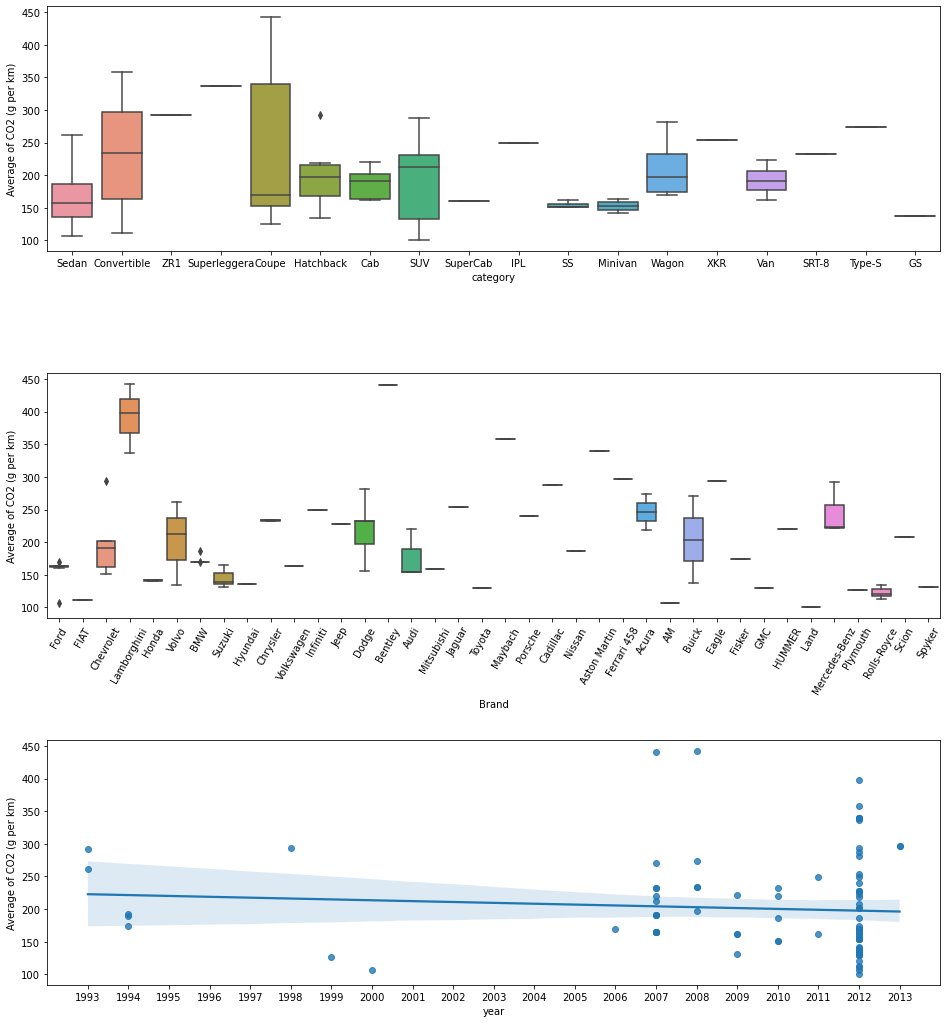

In [2]:
fig = plt.figure(figsize=(16,18))
plt.subplots_adjust(hspace=.5)
ax = fig.add_subplot(3,1,1)
sns.boxplot(data=emission_data, x="category", y="Average of CO2 (g per km)", ax=ax)
ax = fig.add_subplot(3,1,2)
sns.boxplot(data=emission_data, x="Brand", y="Average of CO2 (g per km)", ax=ax)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=60)
ax = fig.add_subplot(3,1,3)
sns.regplot(data=emission_data, x="year", y="Average of CO2 (g per km)")
ax.set_xticks(range(emission_data["year"].min(), emission_data["year"].max()+1, 1))
plt.show()

Looking at this data, it seems it will be hard to predict emissions from the model, model category, brand or year only. **We conclude it will probably be best to use a regression model on car images.** We will most likely test both approaches (classification and regression).

Now that we know how the data looks, let's move on to our first models.